# Optimizers

During the training process, the weights (model parameters) of our model change such that it minimizes the loss function, and make our predictions as correct as possible. But how exactly do you do that? How do you change the parameters of your model, by how much, and when?

This is where optimizers come in. They tie together the loss function and model parameters by updating the model in response to the output of the loss function. In simpler terms, optimizers shape and mold your model into its most accurate possible form by futzing with the weights. The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction.

In this tutorial, we shall explore various optimizers and their performance on a simple classification task on CIFAR10 dataset

In [1]:
# Basic imports

import numpy as np
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)



cuda:0


### Dataloader
For efficient training, we need to make sure that our code is efficient enough to send data from RAM to GPU and vice-versa. 
For some standard datasets like MNIST, CIFAR-10 etc., we already have some well structured dataloaders. In this tutorial, we will be using the CIFAR-10 dataloader.

For more you can visit the following links:
- Existing dataloaders - https://pytorch.org/docs/stable/data.html_
- How to write dataloaders for your custom dataset - https://pytorch.org/tutorials/beginner/data_loading_tutorial.html_

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


 Let us show some of the training images, for fun.

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

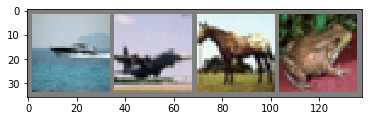

 ship plane horse  frog


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

###  Define a Convolutional Neural Network

In [5]:
# Model definition:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)

### Define the loss function (cross-entropy loss)

$$\mathcal{L}(\hat{y}, y) = - \sum_{i = 1}^{N} y_i log \hat{y}_i$$

In [6]:

# We use Cross Entropy as our loss function in this classfication task
criterion = nn.CrossEntropyLoss()

### The train loop

In [9]:
def train():
    
    loss_values = []
    for epoch in range(10):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
                
            
        loss_values.append(running_loss / len(trainloader))
       
    #plt.plot(loss_values)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
    return loss_values

    
    

## SGD without momentum

Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example x<sup>(i)</sup> and label y<sup>(i)</sup> as follows:
![image.png](attachment:image.png)

Hence it is usually faster and can be used to learn online


In [10]:
optimizer = torch.optim.SGD(net.parameters(), lr = 0.0001, momentum = 0)
losses_sgd_01 = train()

[1,  2000] loss: 2.054
[1,  4000] loss: 2.056
[1,  6000] loss: 2.064
[1,  8000] loss: 2.054
[1, 10000] loss: 2.050
[1, 12000] loss: 2.034
[2,  2000] loss: 2.029
[2,  4000] loss: 2.031
[2,  6000] loss: 2.025
[2,  8000] loss: 2.014
[2, 10000] loss: 2.010
[2, 12000] loss: 1.995
[3,  2000] loss: 1.984
[3,  4000] loss: 1.980
[3,  6000] loss: 1.999
[3,  8000] loss: 1.975
[3, 10000] loss: 1.960
[3, 12000] loss: 1.969
[4,  2000] loss: 1.977
[4,  4000] loss: 1.950
[4,  6000] loss: 1.934
[4,  8000] loss: 1.935
[4, 10000] loss: 1.935
[4, 12000] loss: 1.930
[5,  2000] loss: 1.920
[5,  4000] loss: 1.902
[5,  6000] loss: 1.914
[5,  8000] loss: 1.919
[5, 10000] loss: 1.901
[5, 12000] loss: 1.883
[6,  2000] loss: 1.880
[6,  4000] loss: 1.886
[6,  6000] loss: 1.871
[6,  8000] loss: 1.877
[6, 10000] loss: 1.864
[6, 12000] loss: 1.849
[7,  2000] loss: 1.841
[7,  4000] loss: 1.851
[7,  6000] loss: 1.849
[7,  8000] loss: 1.839
[7, 10000] loss: 1.833
[7, 12000] loss: 1.825
[8,  2000] loss: 1.829
[8,  4000] 

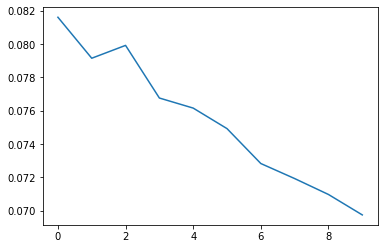

In [11]:
plt.plot(losses_sgd_01)

## SGD with momentum

SGD has trouble navigating ravines, i.e. areas where the surface curves much more steeply in one dimension than in another, which are common around local optima. In these scenarios, SGD oscillates across the slopes of the ravine while only making hesitant progress along the bottom towards the local optimum.
![image.png](attachment:image.png)

Momentum [5] is a method that helps accelerate SGD in the relevant direction and dampens oscillations as can be seen in Image 3. It does this by adding a fraction γ of the update vector of the past time step to the current update vector:
![image.png](attachment:image.png)

Essentially, when using momentum, we push a ball down a hill. The ball accumulates momentum as it rolls downhill, becoming faster and faster on the way (until it reaches its terminal velocity if there is air resistance, i.e. γ<1). The same thing happens to our parameter updates: The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.

In [12]:

optimizer = torch.optim.SGD(net.parameters(), lr = 0.0001, momentum = 0.9)
losses = train()

[1,  2000] loss: 1.772
[1,  4000] loss: 1.751
[1,  6000] loss: 1.691
[1,  8000] loss: 1.671
[1, 10000] loss: 1.641
[1, 12000] loss: 1.606
[2,  2000] loss: 1.551
[2,  4000] loss: 1.537
[2,  6000] loss: 1.538
[2,  8000] loss: 1.523
[2, 10000] loss: 1.508
[2, 12000] loss: 1.498
[3,  2000] loss: 1.457
[3,  4000] loss: 1.468
[3,  6000] loss: 1.428
[3,  8000] loss: 1.437
[3, 10000] loss: 1.415
[3, 12000] loss: 1.424
[4,  2000] loss: 1.401
[4,  4000] loss: 1.363
[4,  6000] loss: 1.367
[4,  8000] loss: 1.358
[4, 10000] loss: 1.375
[4, 12000] loss: 1.350
[5,  2000] loss: 1.310
[5,  4000] loss: 1.317
[5,  6000] loss: 1.305
[5,  8000] loss: 1.301
[5, 10000] loss: 1.280
[5, 12000] loss: 1.291
[6,  2000] loss: 1.258
[6,  4000] loss: 1.250
[6,  6000] loss: 1.237
[6,  8000] loss: 1.253
[6, 10000] loss: 1.213
[6, 12000] loss: 1.207
[7,  2000] loss: 1.185
[7,  4000] loss: 1.176
[7,  6000] loss: 1.187
[7,  8000] loss: 1.194
[7, 10000] loss: 1.166
[7, 12000] loss: 1.177
[8,  2000] loss: 1.149
[8,  4000] 

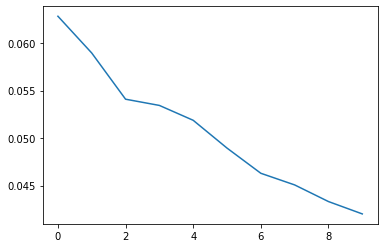

In [13]:
plt.plot(losses)

As we can see, the accuracy has improved when we use Momentum rather than using vanilla SGD

## ADAM

Adaptive Moment Estimation (Adam) is another method that computes adaptive learning rates for each parameter. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface

In [15]:
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
losses = train()

[1,  2000] loss: 1.383
[1,  4000] loss: 1.329
[1,  6000] loss: 1.286
[1,  8000] loss: 1.273
[1, 10000] loss: 1.217
[1, 12000] loss: 1.222
[2,  2000] loss: 1.140
[2,  4000] loss: 1.144
[2,  6000] loss: 1.122
[2,  8000] loss: 1.131
[2, 10000] loss: 1.147
[2, 12000] loss: 1.113
[3,  2000] loss: 1.033
[3,  4000] loss: 1.059
[3,  6000] loss: 1.033
[3,  8000] loss: 1.047
[3, 10000] loss: 1.064
[3, 12000] loss: 1.049
[4,  2000] loss: 0.962
[4,  4000] loss: 1.008
[4,  6000] loss: 1.007
[4,  8000] loss: 0.985
[4, 10000] loss: 1.011
[4, 12000] loss: 1.011
[5,  2000] loss: 0.930
[5,  4000] loss: 0.937
[5,  6000] loss: 0.947
[5,  8000] loss: 0.980
[5, 10000] loss: 0.964
[5, 12000] loss: 0.967
[6,  2000] loss: 0.888
[6,  4000] loss: 0.881
[6,  6000] loss: 0.925
[6,  8000] loss: 0.928
[6, 10000] loss: 0.941
[6, 12000] loss: 0.949
[7,  2000] loss: 0.842
[7,  4000] loss: 0.881
[7,  6000] loss: 0.885
[7,  8000] loss: 0.904
[7, 10000] loss: 0.922
[7, 12000] loss: 0.913
[8,  2000] loss: 0.864
[8,  4000] 

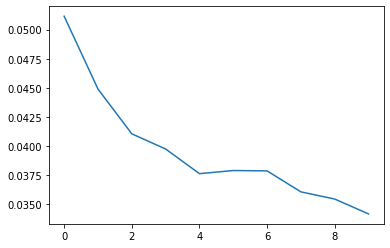

In [16]:
plt.plot(losses)

## ADAGRAD 

Adagrad is an algorithm for gradient-based optimization that adapts the learning rate to the parameters by performing smaller updates (i.e. low learning rates) for parameters associated with frequently occurring features, and larger updates (i.e. high learning rates) for parameters associated with infrequent features. For this reason, it is well-suited for dealing with sparse data.

In [ ]:
optimizer = torch.optim.Adagrad(net.parameters(), lr=0.0001)
losses_adagrad_0001 = train()

[1,  2000] loss: 0.758


In [ ]:
plt.plot(losses_adagrad_0001)

## RMSprop

torch.optim.RMSprop(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

The RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. 

In [0]:
#Learning_rate = 0.01
#alpha=0.99
# eps=1e-08
# weight_decay=0
# momentum=0.9
losses_RMSprop_0001 = train(optim.RMSprop,0.01,0.99,1e-08,0,0.9,False)

In [0]:
plt.plot(losses_RMSprop_0001)

### Comparision of all losses:

In [0]:
plt.plot(losses_sgd_01)
plt.plot(losses)
plt.plot(losses_adagrad_0001)
plt.plot(losses_adam_0001)
plt.plot(losses_RMSprop_0001)
plt.legend(['SGD without momentum','SGD with momentum','AdaGrad','Adam','RMSProp'],loc='upper right')